In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = [[0.87, 1.], [0.88, 1.], [0.25, 0.], [1., 1.]]
df = pd.DataFrame(data, index=['Precision', 'AUC', 'False Alarm Rate', 'Recall'], columns=['A1 (GHOST2)', 'A6 (Traditional)'])

In [3]:
df

,A1 (GHOST2),A6 (Traditional)
Precision,0.87,1.0
AUC,0.88,1.0
False Alarm Rate,0.25,0.0
Recall,1.00,1.0


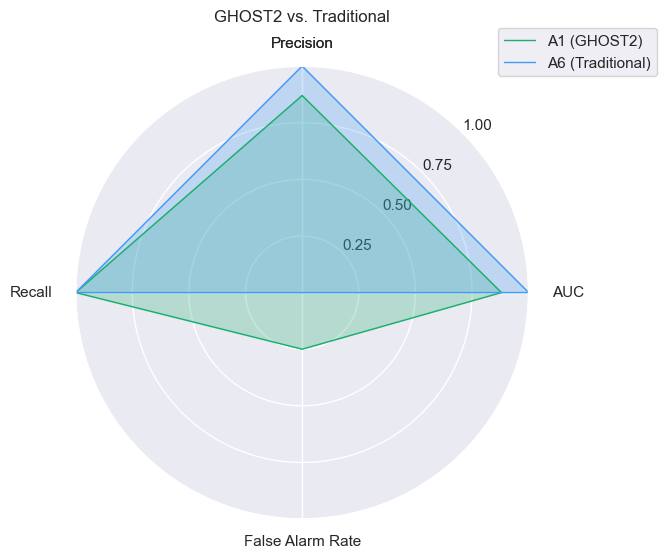

In [42]:
# from https://www.pythoncharts.com/matplotlib/radar-charts/
sns.set()

fig, ax = plt.subplots(figsize=(6, 6), dpi=100, subplot_kw=dict(polar=True))
num_vars = len(df.index)
angles = np.linspace(0, 2* np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

def add_to_radar(treatment, color):
    values = df[treatment].tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=1, label=treatment)
    ax.fill(angles, values, color=color, alpha=0.25)

add_to_radar('A1 (GHOST2)', '#1aaf6c')
add_to_radar('A6 (Traditional)', '#429bf4')

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_thetagrids(np.degrees(angles), [*df.index, df.index[0]])

for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (0, np.pi):
        label.set_horizontalalignment('center')
    elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')

ax.set_ylim(0., 1.)
ax.set_rgrids([0.25, 0.5, 0.75, 1.])

ax.set_rlabel_position(180 / num_vars)
"""
ax.tick_params(colors='#222')
ax.tick_params(axis='y', labelsize=8)
ax.grid(color='#AAA')
ax.spines['polar'].set_color('#222')
ax.set_facecolor('#FAFAFA')
"""
ax.set_title('GHOST2 vs. Traditional', y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))